#*Twitter Sentiment Analysis with NLP*





data source: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

# IMPORT LIBRARIES AND DATASETS

---



## Import DATA from Kaggle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [4]:
!cd /content/gdrive/MyDrive/Kaggle/

In [5]:
!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech


  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 163MB/s]


In [6]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  twitter-sentiment-analysis-hatred-speech.zip
  inflating: test.csv                
  inflating: train.csv               


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Load the data
tweets_train = pd.read_csv('train.csv')
tweets_test = pd.read_csv('test.csv')

In [9]:
tweets_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [17]:
tweets_test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [14]:
tweets_train.shape, tweets_test.shape

((31962, 3), (17197, 2))

In [16]:
tweets_train.info(), tweets_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


(None, None)

MINI CHALLENGE #1:
- Drop the 'id' column from the DataFrame.
- Ensure that the column has been succesfully dropped.

In [34]:
tweets_train = tweets_train.drop(['id'], axis=1)


In [37]:
tweets_test = tweets_test.drop(['id'], axis=1)

In [39]:
tweets_train

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [40]:
tweets_test

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."
...,...
17192,thought factory: left-right polarisation! #tru...
17193,feeling like a mermaid ð #hairflip #neverre...
17194,#hillary #campaigned today in #ohio((omg)) &am...
17195,"happy, at work conference: right mindset leads..."


# TASK #3: EXPLORE DATASET

<Axes: >

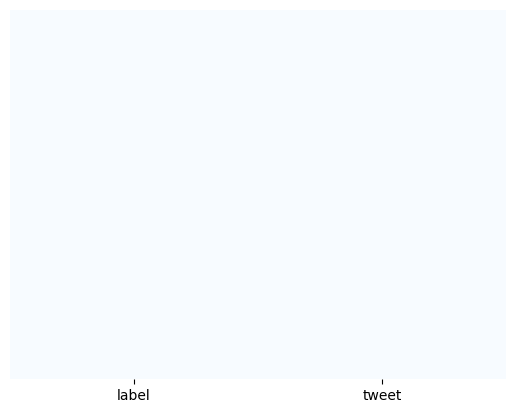

In [43]:
 sns.heatmap(tweets_train.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'label'}>]], dtype=object)

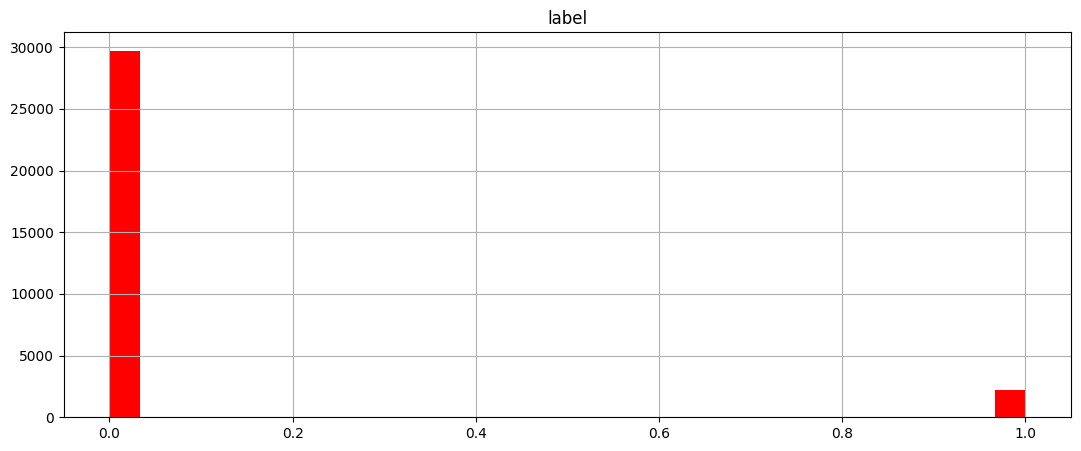

In [44]:
tweets_train.hist(bins = 30, figsize = (13,5), color = 'r')

MINI CHALLENGE #2:
- Plot similar figure using seaborn countplot

<Axes: xlabel='label', ylabel='count'>

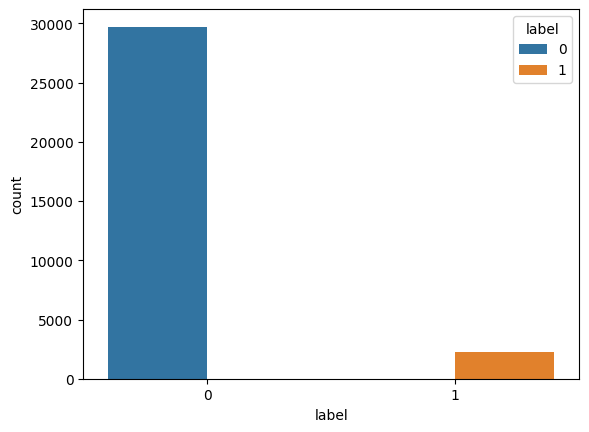

In [84]:
sns.countplot(tweets_train, x='label', hue= 'label')

In [56]:
# Let's get the length of the messages
tweets_train['length'] = tweets_train['tweet'].apply(len)

In [57]:
tweets_train

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<Axes: ylabel='Frequency'>

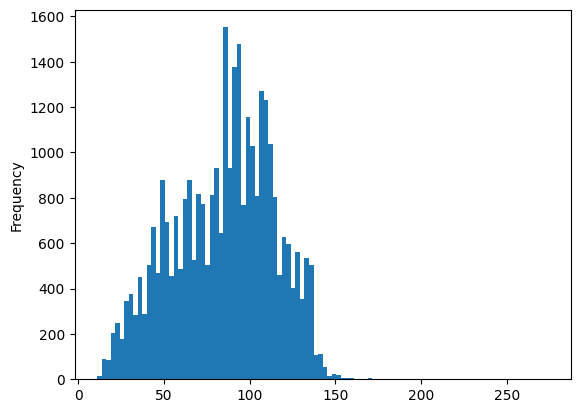

In [58]:
tweets_train['length'].plot(bins=100, kind='hist')

In [60]:
tweets_train.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


11

In [65]:
# Let's see the shortest message
tweets_train[tweets_train['length'] == tweets_train['length'].min() ]['tweet'].iloc[0]

'i love you '

In [69]:
# Let's see the longest message
tweets_train['length'].mean()

84.73962830861649

MINI CHALLENGE #3
- View the message with the average length

In [71]:
tweets_train[tweets_train['length'] == round(tweets_train['length'].mean())]['tweet'].iloc[0]

' â\x86\x9d #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex'

In [73]:
positive = tweets_train[tweets_train['label']==0]

In [74]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [75]:
negative = tweets_train[tweets_train['label']==1]

In [76]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


# TASK #4: PLOT THE WORDCLOUD

In [ ]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

MINI CHALLENGE #4:
- Plot the wordcloud of the "negative" dataframe.
- What do you notice? Does the data make sense?

# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [ ]:
import string
string.punctuation

In [ ]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [ ]:
# Join the characters again to form the string.


MINI CHALLENGE #5:
- Remove punctuations using a different method


# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [ ]:
import nltk # Natural Language tool kit

nltk.download('stopwords')

In [ ]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
Test_punc_removed_join_clean # Only important (no so common) words are left

MINI CHALLENGE #6:
- For the following text, create a pipeline to remove punctuations followed by removing stopwords

In [ ]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

![image.png](attachment:image.png)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']



MINI CHALLENGE #7:
- Without doing any code, perform count vectorization for the following list:
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- Confirm your answer with code

# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [ ]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [ ]:
print(tweets_df_clean[5]) # show the cleaned up version

In [ ]:
print(tweets_df['tweet'][5]) # show the original version

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'], dtype = 'uint8')

In [ ]:
print(vectorizer.get_feature_names())


In [ ]:
print(tweets_countvectorizer.toarray())

In [ ]:
tweets_countvectorizer.shape

In [ ]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())


In [ ]:
X = tweets


In [ ]:
X

In [ ]:
y = tweets_df['label']

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

MINI CHALLENGE #8

![image.png](attachment:image.png)

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

MINI CHALLENGE #9:
- Retrain and reassess the model using a different type of classifier such as logistic regression classifier

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1

In [ ]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

MINI CHALLENGE #2

In [ ]:
sns.countplot(tweets_df['label'], label = "Count")

MINI CHALLENGE #3

In [ ]:
# Let's see the message with mean length
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

MINI CHALLENGE #4

In [ ]:
negative_list = negative['tweet'].tolist()
negative_list
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

MINI CHALLENGE #5

In [ ]:
Test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)

# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

MINI CHALLENGE #6

In [ ]:
challege = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ]

MINI CHALLENGE #7

In [ ]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

MINI CHALLENGE #8

![image.png](attachment:image.png)